In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/NSL-KDD/kdd_train.csv")
test = pd.read_csv("/content/drive/MyDrive/NSL-KDD/kdd_test.csv")

In [ ]:
print("Train shape: ",train.shape)
print("Test shape: ",test.shape)

Train shape:  (125973, 42)
Test shape:  (22544, 42)


## Train Dataset

In [ ]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


## Test Dataset

In [ ]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,5,tcp,smtp,SF,2429,475,0,0,0,0,...,57,0.11,0.02,0.01,0.04,0.0,0.0,0.87,0.0,normal
1,0,udp,domain_u,SF,45,134,0,0,0,0,...,155,0.80,0.02,0.01,0.00,0.0,0.0,0.00,0.0,normal
2,0,udp,domain_u,SF,45,80,0,0,0,0,...,255,1.00,0.00,0.01,0.00,0.0,0.0,0.00,0.0,normal
3,1979,udp,other,SF,145,105,0,0,0,0,...,2,0.01,0.84,1.00,0.00,0.0,0.0,0.00,0.0,normal
4,14462,tcp,other,RSTR,1,0,0,0,0,0,...,2,0.01,0.68,1.00,0.00,0.0,0.0,1.00,1.0,portsweep


## Unique Labels

In [ ]:
train["labels"].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

## Mapping fields to attack classes

In [ ]:
mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
        'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
        'sqlattack': 'U2R','httptunnel': 'U2R',
        'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
        'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
        'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
        'normal': 'Normal'
        }

In [ ]:
train['attack_class'] = train['labels'].map(mapping)
test['attack_class'] = test['labels'].map(mapping)

In [ ]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,Normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,Normal


## Train Data Description

In [ ]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train['num_outbound_cmds'].value_counts()
test['num_outbound_cmds'].value_counts()

0    22544
Name: num_outbound_cmds, dtype: int64

In [ ]:
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [ ]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,Normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,Normal


In [ ]:
attack_class_freq_train = train[['attack_class']].apply(lambda x: x.value_counts())
attack_class_freq_test = test[['attack_class']].apply(lambda x: x.value_counts())
attack_class_freq_train['frequency_percent_train'] = round((100 * attack_class_freq_train / attack_class_freq_train.sum()),2)
attack_class_freq_test['frequency_percent_test'] = round((100 * attack_class_freq_test / attack_class_freq_test.sum()),2)

attack_class_dist = pd.concat([attack_class_freq_train,attack_class_freq_test], axis=1) 
attack_class_dist

,attack_class,frequency_percent_train,attack_class,frequency_percent_test
Normal,67343,53.46,11245,49.88
DoS,45927,36.46,8095,35.91
Probe,11656,9.25,2157,9.57
R2L,995,0.79,968,4.29
U2R,52,0.04,79,0.35


## Plot

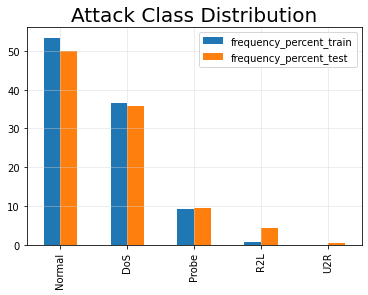

In [ ]:
plot = attack_class_dist[['frequency_percent_train', 'frequency_percent_test']].plot(kind="bar");
plot.set_title("Attack Class Distribution", fontsize=20);
plot.grid(color='lightgray', alpha=0.5);

# Encoding numerical and categorical attributes

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [ ]:
sc_traindf

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.324063,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0.734343,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0.734343,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,-1.533670,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0.734343,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0.734343,-0.818890,-0.938287,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387
125969,-0.107178,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0.734343,1.159389,0.977304,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387
125970,-0.110249,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0.734343,-0.773724,-0.893738,-0.121485,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387
125971,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0.734343,-0.972455,-1.094207,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrain = train.select_dtypes(include=['object']).copy()
cattest = test.select_dtypes(include=['object']).copy()

# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

# separate target column from encoded data 
enctrain = traincat.drop(['attack_class'], axis=1)
enctest = testcat.drop(['attack_class'], axis=1)

cat_Ytrain = traincat[['attack_class']].copy()
cat_Ytest = testcat[['attack_class']].copy()

In [ ]:
enctrain

,protocol_type,service,flag,labels
0,1,20,9,11
1,2,44,9,11
2,1,49,5,9
3,1,24,9,11
4,1,24,9,11
...,...,...,...,...
125968,1,49,5,9
125969,2,49,9,11
125970,1,54,9,11
125971,1,30,5,9


In [ ]:
cat_Ytrain

,attack_class
0,1
1,1
2,0
3,1
4,1
...,...
125968,0
125969,1
125970,1
125971,0


In [ ]:
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter

# define columns and extract encoded train set for sampling 
sc_traindf = train.select_dtypes(include=['float64','int64'])
refclasscol = pd.concat([sc_traindf, enctrain], axis=1).columns
refclass = np.concatenate((sc_train, enctrain.values), axis=1)
X = refclass

In [ ]:
refclass

array([[-1.10249223e-01, -7.67859947e-03, -4.91864438e-03, ...,
         2.00000000e+01,  9.00000000e+00,  1.10000000e+01],
       [-1.10249223e-01, -7.73736981e-03, -4.91864438e-03, ...,
         4.40000000e+01,  9.00000000e+00,  1.10000000e+01],
       [-1.10249223e-01, -7.76224074e-03, -4.91864438e-03, ...,
         4.90000000e+01,  5.00000000e+00,  9.00000000e+00],
       ...,
       [-1.10249223e-01, -7.38219253e-03, -4.82315176e-03, ...,
         5.40000000e+01,  9.00000000e+00,  1.10000000e+01],
       [-1.10249223e-01, -7.76224074e-03, -4.91864438e-03, ...,
         3.00000000e+01,  5.00000000e+00,  9.00000000e+00],
       [-1.10249223e-01, -7.73651807e-03, -4.91864438e-03, ...,
         2.00000000e+01,  9.00000000e+00,  1.10000000e+01]])

In [ ]:
# reshape target column to 1D array shape  
c, r = cat_Ytest.values.shape
y_test = cat_Ytest.values.reshape(c,)
y_test

array([1, 1, 1, ..., 0, 2, 1])

In [ ]:
# reshape target column to 1D array shape  
c, r = cat_Ytest.values.shape
y_test = cat_Ytest.values.reshape(c,)

c, r = cat_Ytrain.values.shape
y = cat_Ytrain.values.reshape(c,)

# apply the random over-sampling
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({1: 67343, 0: 45927, 2: 11656, 3: 995, 4: 52})
Resampled dataset shape Counter({1: 67343, 0: 67343, 3: 67343, 2: 67343, 4: 67343})


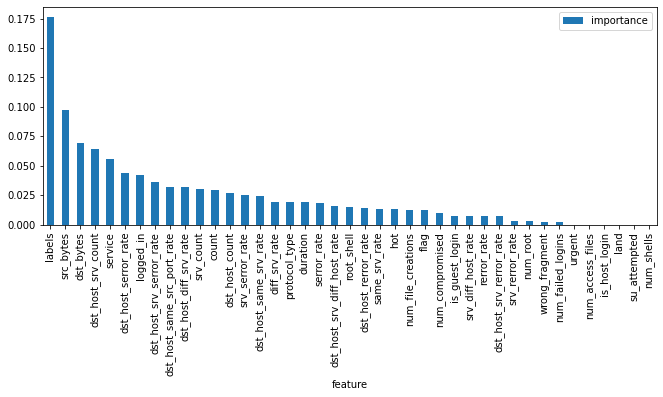

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(X_res, y_res);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':refclasscol,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [ ]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_res, y_res)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), refclasscol)]
selected_features = [v for i, v in feature_map if i==True]

In [ ]:
selected_features

['src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'service',
 'labels']

In [ ]:
# define columns to new dataframe
newcol = list(refclasscol)
newcol.append('attack_class')

# add a dimension to target
new_y_res = y_res[:, np.newaxis]

# create a dataframe from sampled data
res_arr = np.concatenate((X_res, new_y_res), axis=1)
res_df = pd.DataFrame(res_arr, columns = newcol) 

# create test dataframe
reftest = pd.concat([sc_testdf, testcat], axis=1)
reftest['attack_class'] = reftest['attack_class'].astype(np.float64)
reftest['protocol_type'] = reftest['protocol_type'].astype(np.float64)
reftest['flag'] = reftest['flag'].astype(np.float64)
reftest['service'] = reftest['service'].astype(np.float64)

res_df.shape
reftest.shape

(22544, 42)

In [ ]:
res_df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,labels,attack_class
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,1.0,20.0,9.0,11.0,1.0
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,2.0,44.0,9.0,11.0,1.0
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.289103,1.608759,1.618955,-0.387635,-0.376387,1.0,49.0,5.0,9.0,0.0
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,1.0,24.0,9.0,11.0,1.0
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1.0,24.0,9.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336710,-0.110249,-0.007762,-0.003517,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,0.071872,...,0.599285,-0.639532,-0.624871,-0.387635,-0.376387,1.0,20.0,9.0,16.0,4.0
336711,-0.042674,-0.007497,-0.004239,-0.014089,-0.089486,-0.007736,1.300299,-0.027023,1.235694,0.155407,...,-0.289103,-0.639532,-0.624871,0.003811,-0.000751,1.0,60.0,9.0,1.0,4.0
336712,-0.110249,-0.007762,-0.003469,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1.0,20.0,9.0,1.0,4.0
336713,-0.110249,-0.007762,-0.004403,-0.014089,-0.089486,-0.007736,0.370049,-0.027023,1.235694,-0.011664,...,-0.111426,-0.639532,-0.624871,-0.387635,-0.376387,1.0,20.0,9.0,1.0,4.0


In [ ]:
reftest

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,labels,attack_class
0,-0.116219,-0.021090,-0.039596,-0.009419,-0.07811,-0.010877,-0.091546,-0.083694,1.209330,-0.02281,...,0.110651,-0.558559,-0.547234,2.107579,-0.438112,1.0,51.0,9.0,16,1.0
1,-0.118508,-0.026199,-0.045014,-0.009419,-0.07811,-0.010877,-0.091546,-0.083694,-0.826904,-0.02281,...,-0.266835,-0.558559,-0.547234,-0.456918,-0.438112,2.0,12.0,9.0,16,1.0
2,-0.118508,-0.026199,-0.045873,-0.009419,-0.07811,-0.010877,-0.091546,-0.083694,-0.826904,-0.02281,...,-0.266835,-0.558559,-0.547234,-0.456918,-0.438112,2.0,12.0,9.0,16,1.0
3,0.787500,-0.025985,-0.045475,-0.009419,-0.07811,-0.010877,-0.091546,-0.083694,-0.826904,-0.02281,...,-0.266835,-0.558559,-0.547234,-0.456918,-0.438112,2.0,41.0,9.0,16,1.0
4,6.502357,-0.026294,-0.047144,-0.009419,-0.07811,-0.010877,-0.091546,-0.083694,-0.826904,-0.02281,...,-0.266835,-0.558559,-0.547234,2.490779,2.414926,1.0,41.0,4.0,20,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.118508,-0.026296,-0.047144,-0.009419,-0.07811,-0.010877,-0.091546,-0.083694,-0.826904,-0.02281,...,-0.266835,-0.339397,-0.547234,2.225486,2.414926,1.0,46.0,1.0,25,2.0
22540,-0.118508,-0.025751,-0.010961,-0.009419,-0.07811,-0.010877,-0.091546,-0.083694,1.209330,-0.02281,...,0.110651,-0.558559,-0.547234,-0.456918,-0.438112,1.0,23.0,9.0,16,1.0
22541,-0.118508,-0.026296,-0.047144,-0.009419,-0.07811,-0.010877,-0.091546,-0.083694,-0.826904,-0.02281,...,-0.266835,1.876569,1.877064,-0.456918,-0.438112,1.0,46.0,5.0,14,0.0
22542,-0.118508,-0.026296,-0.047144,-0.009419,-0.07811,-0.010877,-0.091546,-0.083694,-0.826904,-0.02281,...,-0.266835,-0.558559,-0.547234,1.252746,2.414926,1.0,46.0,4.0,20,2.0


In [ ]:
from collections import defaultdict
classdict = defaultdict(list)

# create two-target classes (normal class and an attack class)  
attacklist = [('DoS', 0.0), ('Probe', 2.0), ('R2L', 3.0), ('U2R', 4.0)]
normalclass = [('Normal', 1.0)]

def create_classdict():
    '''This function subdivides train and test dataset into two-class attack labels''' 
    for j, k in normalclass: 
        for i, v in attacklist: 
            restrain_set = res_df.loc[(res_df['attack_class'] == k) | (res_df['attack_class'] == v)]
            classdict[j +'_' + i].append(restrain_set)
            # test labels
            reftest_set = reftest.loc[(reftest['attack_class'] == k) | (reftest['attack_class'] == v)]
            classdict[j +'_' + i].append(reftest_set)
        
create_classdict()

In [ ]:
classdict.keys()

dict_keys(['Normal_DoS', 'Normal_Probe', 'Normal_R2L', 'Normal_U2R'])

In [ ]:
classdict['Normal_Probe'][1]

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,labels,attack_class
0,-0.116219,-0.021090,-0.039596,-0.009419,-0.07811,-0.010877,-0.091546,-0.083694,1.209330,-0.02281,...,0.110651,-0.558559,-0.547234,2.107579,-0.438112,1.0,51.0,9.0,16,1.0
1,-0.118508,-0.026199,-0.045014,-0.009419,-0.07811,-0.010877,-0.091546,-0.083694,-0.826904,-0.02281,...,-0.266835,-0.558559,-0.547234,-0.456918,-0.438112,2.0,12.0,9.0,16,1.0
2,-0.118508,-0.026199,-0.045873,-0.009419,-0.07811,-0.010877,-0.091546,-0.083694,-0.826904,-0.02281,...,-0.266835,-0.558559,-0.547234,-0.456918,-0.438112,2.0,12.0,9.0,16,1.0
3,0.787500,-0.025985,-0.045475,-0.009419,-0.07811,-0.010877,-0.091546,-0.083694,-0.826904,-0.02281,...,-0.266835,-0.558559,-0.547234,-0.456918,-0.438112,2.0,41.0,9.0,16,1.0
4,6.502357,-0.026294,-0.047144,-0.009419,-0.07811,-0.010877,-0.091546,-0.083694,-0.826904,-0.02281,...,-0.266835,-0.558559,-0.547234,2.490779,2.414926,1.0,41.0,4.0,20,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22534,-0.118508,-0.026296,-0.047144,-0.009419,-0.07811,-0.010877,-0.091546,-0.083694,-0.826904,-0.02281,...,-0.266835,-0.534207,-0.547234,2.461302,2.414926,1.0,41.0,1.0,25,2.0
22539,-0.118508,-0.026296,-0.047144,-0.009419,-0.07811,-0.010877,-0.091546,-0.083694,-0.826904,-0.02281,...,-0.266835,-0.339397,-0.547234,2.225486,2.414926,1.0,46.0,1.0,25,2.0
22540,-0.118508,-0.025751,-0.010961,-0.009419,-0.07811,-0.010877,-0.091546,-0.083694,1.209330,-0.02281,...,0.110651,-0.558559,-0.547234,-0.456918,-0.438112,1.0,23.0,9.0,16,1.0
22542,-0.118508,-0.026296,-0.047144,-0.009419,-0.07811,-0.010877,-0.091546,-0.083694,-0.826904,-0.02281,...,-0.266835,-0.558559,-0.547234,1.252746,2.414926,1.0,46.0,4.0,20,2.0


In [ ]:
pretrain = classdict['Normal_DoS'][0]
pretest = classdict['Normal_DoS'][1]
grpclass = 'Normal_DoS'

In [ ]:
pretrain

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,labels,attack_class
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,1.0,20.0,9.0,11.0,1.0
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,2.0,44.0,9.0,11.0,1.0
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.289103,1.608759,1.618955,-0.387635,-0.376387,1.0,49.0,5.0,9.0,0.0
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,1.0,24.0,9.0,11.0,1.0
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1.0,24.0,9.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147384,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.289103,1.608759,1.618955,-0.387635,-0.376387,1.0,41.0,5.0,9.0,0.0
147385,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.289103,1.608759,1.618955,-0.387635,-0.376387,1.0,29.0,5.0,9.0,0.0
147386,-0.110249,-0.007586,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.289103,-0.144908,-0.624871,-0.322394,-0.376387,0.0,15.0,9.0,18.0,0.0
147387,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.289103,1.608759,1.618955,-0.387635,-0.376387,1.0,58.0,5.0,9.0,0.0


In [ ]:
pretest

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,labels,attack_class
0,-0.116219,-0.021090,-0.039596,-0.009419,-0.07811,-0.010877,-0.091546,-0.083694,1.209330,-0.02281,...,0.110651,-0.558559,-0.547234,2.107579,-0.438112,1.0,51.0,9.0,16,1.0
1,-0.118508,-0.026199,-0.045014,-0.009419,-0.07811,-0.010877,-0.091546,-0.083694,-0.826904,-0.02281,...,-0.266835,-0.558559,-0.547234,-0.456918,-0.438112,2.0,12.0,9.0,16,1.0
2,-0.118508,-0.026199,-0.045873,-0.009419,-0.07811,-0.010877,-0.091546,-0.083694,-0.826904,-0.02281,...,-0.266835,-0.558559,-0.547234,-0.456918,-0.438112,2.0,12.0,9.0,16,1.0
3,0.787500,-0.025985,-0.045475,-0.009419,-0.07811,-0.010877,-0.091546,-0.083694,-0.826904,-0.02281,...,-0.266835,-0.558559,-0.547234,-0.456918,-0.438112,2.0,41.0,9.0,16,1.0
5,-0.118508,-0.026296,-0.047144,-0.009419,-0.07811,-0.010877,-0.091546,-0.083694,-0.826904,-0.02281,...,-0.266835,1.876569,1.877064,-0.456918,-0.438112,1.0,46.0,5.0,14,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22537,-0.118508,-0.026296,-0.046445,-0.009419,-0.07811,-0.010877,-0.091546,-0.083694,-0.826904,-0.02281,...,-0.266835,0.391141,1.343718,0.840069,-0.381051,1.0,57.0,8.0,21,0.0
22538,-0.118508,-0.026296,-0.047144,-0.009419,-0.07811,-0.010877,-0.091546,-0.083694,-0.826904,-0.02281,...,-0.266835,-0.558559,-0.547234,2.490779,2.414926,1.0,63.0,1.0,14,0.0
22540,-0.118508,-0.025751,-0.010961,-0.009419,-0.07811,-0.010877,-0.091546,-0.083694,1.209330,-0.02281,...,0.110651,-0.558559,-0.547234,-0.456918,-0.438112,1.0,23.0,9.0,16,1.0
22541,-0.118508,-0.026296,-0.047144,-0.009419,-0.07811,-0.010877,-0.091546,-0.083694,-0.826904,-0.02281,...,-0.266835,1.876569,1.877064,-0.456918,-0.438112,1.0,46.0,5.0,14,0.0


In [ ]:
pretrain['service'].value_counts()

24.0    41389
49.0    24335
12.0     9034
54.0     7362
20.0     6735
        ...  
1.0        67
64.0       10
62.0        8
50.0        8
61.0        3
Name: service, Length: 65, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

Xresdf = pretrain 
newtest = pretest

# select only the selected features from the pretrain dataset
Xresdfnew = Xresdf[selected_features]
Xresdfnum = Xresdfnew.drop(['service'], axis=1)
Xresdfcat = Xresdfnew[['service']].copy()

Xtest_features = newtest[selected_features]
Xtestdfnum = Xtest_features.drop(['service'], axis=1)
Xtestcat = Xtest_features[['service']].copy()


# Fit train data
enc.fit(Xresdfcat)

# Transform train data
X_train_1hotenc = enc.transform(Xresdfcat).toarray()
       
# Transform test data
X_test_1hotenc = enc.transform(Xtestcat).toarray()

X_train = np.concatenate((Xresdfnum.values, X_train_1hotenc), axis=1)
X_test = np.concatenate((Xtestdfnum.values, X_test_1hotenc), axis=1) 

y_train = Xresdf[['attack_class']].copy()
c, r = y_train.values.shape
Y_train = y_train.values.reshape(c,)

y_test = newtest[['attack_class']].copy()
c, r = y_test.values.shape
Y_test = y_test.values.reshape(c,)

In [ ]:
Xresdfcat

,service
0,20.0
1,44.0
2,49.0
3,24.0
4,24.0
...,...
147384,41.0
147385,29.0
147386,15.0
147387,58.0


# Models

In [ ]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)
            
# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train);

# Train SVM Model
SVC_Classifier = SVC(random_state=0)
SVC_Classifier.fit(X_train, Y_train)

# Train RandomForestClassifier Model
RF_Classifier = RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=0)
RF_Classifier.fit(X_train, Y_train);

Decision Tree fitting


NameError: ignored

## Validation

In [ ]:
from sklearn import metrics
import seaborn as sns

models = []
models.append(('SVM Classifier', SVC_Classifier))
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('RandomForest Classifier', RF_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print('\n============================== {} {} Model Evaluation =============================='.format(grpclass, i),"\n")
    print ("Cross Validation Mean Score:" "\n", scores.mean(),"\n")
    print ("Model Accuracy:" "\n", accuracy,"\n")
    print("Confusion matrix:" "\n", confusion_matrix,"/n")
    print("Classification report:" "\n", classification,"\n") 


============================== Normal_DoS SVM Classifier Model Evaluation ============================== 

Cross Validation Mean Score:
 0.9999925749925749 

Model Accuracy:
 0.9999925753233446 

Confusion matrix:
 [[67343     0]
 [    1 67342]] /n
Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     67343
         1.0       1.00      1.00      1.00     67343

    accuracy                           1.00    134686
   macro avg       1.00      1.00      1.00    134686
weighted avg       1.00      1.00      1.00    134686
 


============================== Normal_DoS Naive Baye Classifier Model Evaluation ============================== 

Cross Validation Mean Score:
 0.9781417511260114 

Model Accuracy:
 0.9781417519267036 

Confusion matrix:
 [[65918  1425]
 [ 1519 65824]] /n
Classification report:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     67343
       

In [ ]:
Y_test

array([1., 1., 1., ..., 1., 0., 1.])

# Testing and Performance Evaluation

In [ ]:
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test),zero_division=1)
    print('\n============================== {} {} Model Test Results =============================='.format(grpclass, i),"\n")
    print("Model Accuracy:" "\n", accuracy,"\n")
    print("Confusion matrix:" "\n", confusion_matrix,"\n")
    print("Classification report:" "\n", classification,"\n") 


============================== Normal_DoS SVM Classifier Model Test Results ============================== 

Model Accuracy:
 0.4137021716649431 

Confusion matrix:
 [[ 8001    94]
 [11245     0]] 

Classification report:
               precision    recall  f1-score   support

         0.0       0.42      0.99      0.59      8095
         1.0       0.00      0.00      0.00     11245

    accuracy                           0.41     19340
   macro avg       0.21      0.49      0.29     19340
weighted avg       0.17      0.41      0.24     19340
 


============================== Normal_DoS Naive Baye Classifier Model Test Results ============================== 

Model Accuracy:
 0.8991209927611169 

Confusion matrix:
 [[7666  429]
 [1522 9723]] 

Classification report:
               precision    recall  f1-score   support

         0.0       0.83      0.95      0.89      8095
         1.0       0.96      0.86      0.91     11245

    accuracy                           0.90     19340
  